In [2]:
import pandas as pd
import numpy as np
import random

In [3]:
def shuffle_in_unison_inplace(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [4]:
def getData(pct=0, cast=False):
    # Read data
    train = pd.read_csv('../../data/train/train.csv')
    labels = train.ix[:,0].values
    
    a_train = (train.ix[:,1:].values)/255.0
    a_test = (pd.read_csv('../../data/test/test.csv').values)/255.0
    b_train = labels
    b_test = np.array([random.randint(0,10) for i in range(a_test.shape[0])])
    
    a,b = shuffle_in_unison_inplace(a_train, b_train)
    X_train, y_train = a[pct*a.shape[0]/10:, :], b[pct*a.shape[0]/10:]
    X_valid, y_valid = a[:pct*a.shape[0]/10, :], b[:pct*a.shape[0]/10]
    X_test, y_test = a_test, b_test
    if cast:
        return (X_train.astype('float32'), y_train.astype('int32'), 
                X_valid.astype('float32'), y_valid.astype('int32'), 
                X_test.astype('float32'), y_test.astype('int32'))
    else:
        return (X_train, y_train, X_valid, y_valid, X_test, y_test)

In [5]:
(X_train, y_train, X_valid, y_valid, X_test, y_test) = getData()

In [7]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [1]:
import random

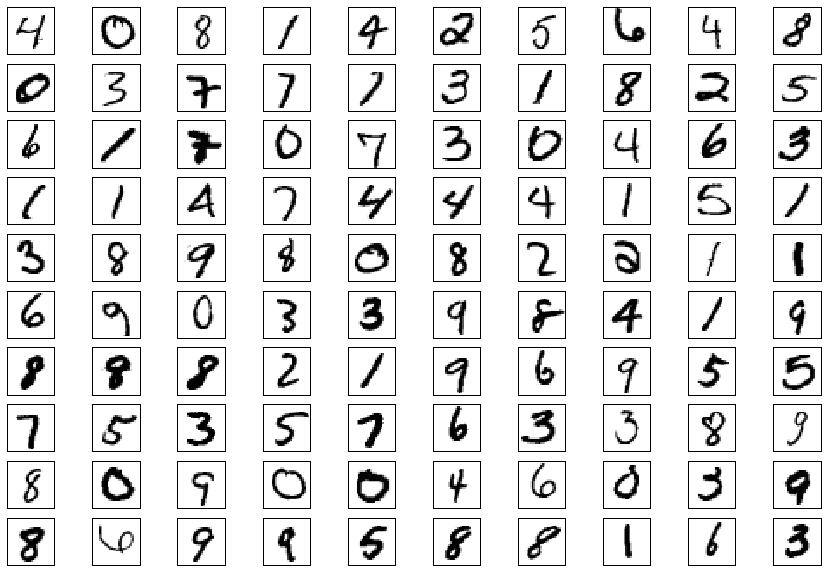

In [162]:
fig = plt.figure(figsize=(15,10))
#image = np.concatenate(images, axis=1)
for x in range(10):
    for y in range(10):
        ax = fig.add_subplot(10, 10, 10*y+x)
        ax.matshow(255*X_train[10*y+x].reshape(28,28), cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
plt.show()

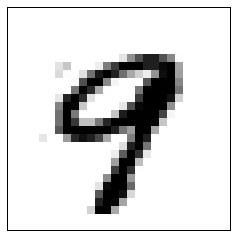

In [163]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.matshow(255*X_train[43].reshape(28,28), cmap = matplotlib.cm.binary)
plt.xticks(np.array([]))
plt.yticks(np.array([]))
plt.show()

In [2]:
from scipy import ndimage
def workImage(i):
    ii = i.reshape(28,28)
    im = ndimage.gaussian_filter(ii, sigma=1./500.)
    mask = im > im.mean()
    label_im, nb_labels = ndimage.label(mask)
    sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))
    mask_size = sizes < 10
    remove_pixel = mask_size[label_im]
    label_im[remove_pixel] = 0
    ii[label_im == 0] = 0
    iii = np.roll(np.roll(ii, -np.argmax(ii.max(axis=0) > 0)), -np.argmax(ii.max(axis=1) > 0), axis=0)
    return iii.reshape(784)

In [ ]:
v = workImage(X_train[random.randint(0, X_train.shape[0])])
plt.imshow(v.reshape(28,28))